In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import petl as etl
import seaborn as sns
import scipy
import numpy as np

In [2]:
homog_tbl_bf = (etl.fromtsv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/BFcol_vs_BFgam/test/putative_directional_selection.tab', delimiter='\t')
             .convert('score_tot', float)
             .convert(['score_c', 'score_g'], float)
             .sort(['score_tot'], reverse=True)
             )

In [3]:
homog_tbl_ao = (etl.fromtsv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/AOcol_vs_GAgam/putative_directional_selection.tab', delimiter='\t')
             .convert('score_tot', float)
             .convert(['score_c', 'score_g'], float)
             .sort(['score_tot'], reverse=True)
             )

In [4]:
len(homog_tbl_bf), len(homog_tbl_ao)

(131, 22)

In [5]:
top_homog_bf = etl.todataframe(homog_tbl_bf)

In [6]:
top_homog_aoga = etl.todataframe(homog_tbl_ao)

In [7]:
df_all = top_homog_bf.merge(top_homog_aoga.drop_duplicates(), on=['gene'], 
                   how='left', indicator=True).rename(columns={"gene" : 'Gene ID', "score_tot_x": 'Dry Savanna Score', 'score_tot_y':'South Rain Forest Score', "_merge": 'Presence'}).drop(columns=['chrom_x','chrom_y'])
df_all

,Gene ID,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,Dry Savanna Score,segreg_c_y,pri_der_fix_c_y,score_c_y,segreg_g_y,pri_der_fix_g_y,score_g_y,South Rain Forest Score,Presence
0,AGAP007732,525,25,57.041104,600,31,86.522099,143.563203,94,23,138.131590,266,32,146.271040,284.402631,both
1,AGAP013341,37,10,115.429774,33,4,22.466469,137.896242,9,10,159.104816,18,4,26.697943,185.802759,both
2,AGAP001035,67,13,115.687116,111,5,11.107270,126.794386,23,14,163.002568,28,5,29.028522,192.031090,both
3,AGAP001076,119,10,40.240718,86,10,61.568362,101.809080,44,12,76.744785,25,10,122.040739,198.785524,both
4,AGAP001023,177,6,8.871824,293,19,67.600179,76.472003,63,6,13.644544,100,20,145.076233,158.720777,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,AGAP003252,117,1,0.049852,130,1,0.050956,0.100809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
126,AGAP001069,150,1,0.013542,213,1,0.078684,0.092226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
127,AGAP000893,386,1,0.046752,487,1,0.007917,0.054668,111,11,27.492851,130,8,17.668149,45.160999,both
128,AGAP013495,450,2,0.022712,466,1,0.010963,0.033675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


---------------------------------------

In [15]:
tbl_top_shared = pd.merge(top_homog_bf, top_homog_aoga, on='gene', how='inner').rename(columns={"gene" : 'Gene ID', 'chrom_x':'chrom'}).drop(columns=['chrom_y','segreg_c_x','segreg_c_y','pri_der_fix_c_x','pri_der_fix_c_y', 'score_tot_y', 'score_tot_x', 'segreg_g_x', 'segreg_g_y','pri_der_fix_g_y','pri_der_fix_g_x'])
tbl_top_shared

,chrom,Gene ID,score_c_x,score_g_x,score_c_y,score_g_y
0,3R,AGAP007732,57.041104,86.522099,138.131590,146.271040
1,X,AGAP013341,115.429774,22.466469,159.104816,26.697943
2,X,AGAP001035,115.687116,11.107270,163.002568,29.028522
3,X,AGAP001076,40.240718,61.568362,76.744785,122.040739
4,X,AGAP001023,8.871824,67.600179,13.644544,145.076233
5,3R,AGAP007736,13.643731,43.356483,181.366668,177.939095
6,X,AGAP001026,33.150134,17.555030,37.074014,36.911725
7,3R,AGAP007731,32.773608,17.733773,80.224187,41.286389
8,X,AGAP001029,15.357547,8.833421,19.494341,20.850108
9,X,AGAP001092,16.841027,7.296069,30.600117,37.075102


In [16]:
tbl_top_shared['An.col sp.'] = tbl_top_shared['score_c_y']/tbl_top_shared['score_c_x']
tbl_top_shared['An.gam sp.'] = tbl_top_shared['score_g_y']/tbl_top_shared['score_g_x']
tbl_top_shared['Savanna Ecotype'] = tbl_top_shared['score_g_x']/tbl_top_shared['score_c_x']
tbl_top_shared['Forest Ecotype'] = tbl_top_shared['score_g_y']/tbl_top_shared['score_c_y']
tbl_top_shared = tbl_top_shared.rename(columns={'score_c_x':'HKA score An.col Savanna',
                                                'score_g_x':'HKA score An.gam Savanna',
                                                'score_c_y':'HKA score An.col Forest',
                                                'score_g_y':'HKA score An.gam Forest',
                                               'chrom':'Chrom'})
tbl_top_shared

,Chrom,Gene ID,HKA score An.col Savanna,HKA score An.gam Savanna,HKA score An.col Forest,HKA score An.gam Forest,An.col sp.,An.gam sp.,Savanna Ecotype,Forest Ecotype
0,3R,AGAP007732,57.041104,86.522099,138.131590,146.271040,2.421615,1.690563,1.516838,1.058925
1,X,AGAP013341,115.429774,22.466469,159.104816,26.697943,1.378369,1.188346,0.194633,0.167801
2,X,AGAP001035,115.687116,11.107270,163.002568,29.028522,1.408995,2.613470,0.096011,0.178086
3,X,AGAP001076,40.240718,61.568362,76.744785,122.040739,1.907143,1.982199,1.530002,1.590215
4,X,AGAP001023,8.871824,67.600179,13.644544,145.076233,1.537964,2.146092,7.619648,10.632545
5,3R,AGAP007736,13.643731,43.356483,181.366668,177.939095,13.293040,4.104094,3.177759,0.981101
6,X,AGAP001026,33.150134,17.555030,37.074014,36.911725,1.118367,2.102630,0.529561,0.995623
7,3R,AGAP007731,32.773608,17.733773,80.224187,41.286389,2.447829,2.328122,0.541099,0.514638
8,X,AGAP001029,15.357547,8.833421,19.494341,20.850108,1.269366,2.360366,0.575184,1.069547
9,X,AGAP001092,16.841027,7.296069,30.600117,37.075102,1.816998,5.081518,0.433232,1.211600


In [11]:
tbl_top_shared = tbl_top_shared.iloc[:,[0,1,-1,-2,-3,-4]].sort_values(by='Gene ID')
tbl_top_shared

,chrom,Gene ID,Forest Ecotype,Savanna Ecotype,An.gambiae,An.coluzzii
19,X,AGAP000893,0.642645,0.169338,2231.721359,588.062115
15,X,AGAP000958,2.104070,1.417714,3.383935,2.280081
17,X,AGAP000974,0.965351,3.667449,3.216401,12.219372
4,X,AGAP001023,10.632545,7.619648,2.146092,1.537964
6,X,AGAP001026,0.995623,0.529561,2.102630,1.118367
8,X,AGAP001029,1.069547,0.575184,2.360366,1.269366
10,X,AGAP001033,0.966204,1.285964,1.640801,2.183817
13,X,AGAP001034,0.703094,0.416471,2.735299,1.620227
2,X,AGAP001035,0.178086,0.096011,2.613470,1.408995
14,X,AGAP001036,0.714215,1.007900,1.472699,2.078274


In [ ]:
def bar_plot(score1,score2,score3, score4, title):
    fig, ax = plt.subplots(figsize=(30, 8))
    

    # set width of bar
    barWidth = 0.25

    # Set position of bar on X axis
    r1 = np.arange(len(score1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    width=1.0

#Forest Ecotype 	Savanna Ecotype 	An.gambiae 	An.coluzzii
    # Make the plot
    plt.bar(r1, score1, color='#0080ff', width=barWidth, edgecolor='white', label='Forest Ecotype')
    plt.bar(r2, score2, color='#557f2d', width=barWidth, edgecolor='white', label='Savanna Ecotype')
    plt.bar(r3, score3, color='#ff9933', width=barWidth, edgecolor='white', label='An.gambiae')
    plt.bar(r4, score3, color='#EE82EE', width=barWidth, edgecolor='white', label='An.coluzzii')

    # Add xticks on the middle of the group bars
    plt.xlabel('Genes', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(score1))], ['AGAP013341',  'AGAP001035',  'AGAP001076',  'AGAP001023',  'AGAP007736',  'AGAP001026',  'AGAP007731',  'AGAP001029',  'AGAP001092',  'AGAP001033',  'AGAP001091',  'AGAP001043',  'AGAP001034',  'AGAP001036',  'AGAP000958',  'AGAP001061',  'AGAP000974', 'AGAP000893'], rotation=45)
    ax.set_xticks(np.arange(0,len(tbl_top_shared)) + width/2)
    plt.ylabel('Total Score', fontweight='bold')

    sns.despine()
    ax.set_title(title)
    # Create legend & Show graphic
    plt.legend()
    plt.show()

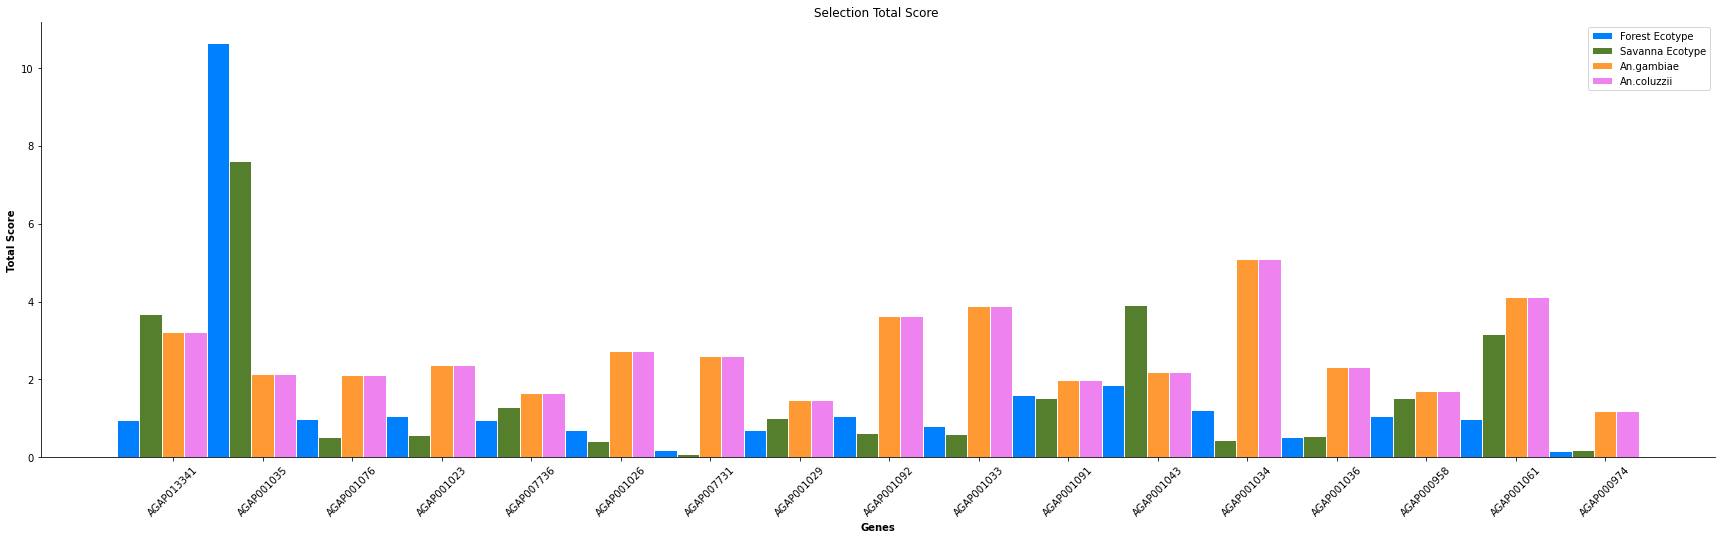

In [87]:
bar_plot(tbl_top_shared['Forest Ecotype'],tbl_top_shared['Savanna Ecotype'],tbl_top_shared['An.gambiae'], tbl_top_shared['An.coluzzii'], 'Selection Total Score ')

-------------------------
## Sandbox

In [55]:
tbl_top_shared.sort_values(by=['Specie'],ascending=False)

,chrom,Gene ID,score_c_x,score_g_x,score_c_y,score_g_y,Cy/Cx,Gx/Cx,Specie,Habitat
5,3R,AGAP007736,13.643731,43.356483,181.366668,177.939095,13.293040,3.177759,13.293040,3.177759
11,X,AGAP001091,3.673772,14.365721,16.852167,31.440793,4.587156,3.910346,4.587156,3.910346
7,3R,AGAP007731,32.773608,17.733773,80.224187,41.286389,2.447829,0.541099,2.447829,0.541099
0,3R,AGAP007732,57.041104,86.522099,138.131590,146.271040,2.421615,1.516838,2.421615,1.516838
15,X,AGAP000958,4.458523,6.320909,10.165795,21.389547,2.280081,1.417714,2.280081,1.417714
10,X,AGAP001033,9.000234,11.573979,19.654864,18.990601,2.183817,1.285964,2.183817,1.285964
12,X,AGAP001043,10.408455,6.585871,22.485484,23.925669,2.160309,0.632742,2.160309,0.632742
14,X,AGAP001036,7.583281,7.643189,15.760134,11.256119,2.078274,1.007900,2.078274,1.007900
3,X,AGAP001076,40.240718,61.568362,76.744785,122.040739,1.907143,1.530002,1.907143,1.530002
9,X,AGAP001092,16.841027,7.296069,30.600117,37.075102,1.816998,0.433232,1.816998,0.433232


In [56]:
tbl_top_shared.sort_values(by=['Habitat'],ascending=False)

,chrom,Gene ID,score_c_x,score_g_x,score_c_y,score_g_y,Cy/Cx,Gx/Cx,Specie,Habitat
4,X,AGAP001023,8.871824,67.600179,13.644544,145.076233,1.537964,7.619648,1.537964,7.619648
11,X,AGAP001091,3.673772,14.365721,16.852167,31.440793,4.587156,3.910346,4.587156,3.910346
5,3R,AGAP007736,13.643731,43.356483,181.366668,177.939095,13.293040,3.177759,13.293040,3.177759
3,X,AGAP001076,40.240718,61.568362,76.744785,122.040739,1.907143,1.530002,1.907143,1.530002
0,3R,AGAP007732,57.041104,86.522099,138.131590,146.271040,2.421615,1.516838,2.421615,1.516838
15,X,AGAP000958,4.458523,6.320909,10.165795,21.389547,2.280081,1.417714,2.280081,1.417714
10,X,AGAP001033,9.000234,11.573979,19.654864,18.990601,2.183817,1.285964,2.183817,1.285964
14,X,AGAP001036,7.583281,7.643189,15.760134,11.256119,2.078274,1.007900,2.078274,1.007900
12,X,AGAP001043,10.408455,6.585871,22.485484,23.925669,2.160309,0.632742,2.160309,0.632742
8,X,AGAP001029,15.357547,8.833421,19.494341,20.850108,1.269366,0.575184,1.269366,0.575184


In [34]:
homog_tbl_bf = (etl.fromtsv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/BFcol_vs_BFgam/test/putative_directional_selection.tab', delimiter='\t')
             .convert('score_tot', float)
             .convert(['score_c', 'score_g'], float)
             .sort(['score_tot'], reverse=True)
             .select(lambda r: (r.score_tot >= 10))
             #.cut(0,1,4)
            
               )
homog_tbl_bf

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
3R,AGAP007732,525,25,57.041104266489945,600,31,86.5220990066677,143.56320327315765
X,AGAP013341,37,10,115.42977355053063,33,4,22.466468549489186,137.8962421000198
X,AGAP001035,67,13,115.687115729528,111,5,11.107270361164474,126.79438609069248
X,AGAP001076,119,10,40.24071764797138,86,10,61.56836185566402,101.8090795036354
X,AGAP001023,177,6,8.871824293852391,293,19,67.60017898980091,76.4720032836533


In [35]:
homog_tbl_ao = (etl.fromtsv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/AOcol_vs_GAgam/putative_directional_selection.tab', delimiter='\t')
             .convert('score_tot', float)
             .convert(['score_c', 'score_g'], float)
             .sort(['score_tot'], reverse=True)
             .select(lambda r: (r.score_tot >= 10))
             #.cut(0,1,4)    
             )

In [36]:
top_homog_bf = etl.todataframe(homog_tbl_bf)
top_homog_aoga = etl.todataframe(homog_tbl_ao)
df_all = top_homog_bf.merge(top_homog_aoga.drop_duplicates(), on=['gene'], 
                   how='left', indicator=True).rename(columns={"gene" : 'Gene ID', "score_c_x": 'Dry Savanna Score coluzzii', 'score_c_y':'South Rain Forest Score coluzzii', "_merge": 'Presence'}).drop(columns=['chrom_x','chrom_y'])
df_all

,Gene ID,segreg_c_x,pri_der_fix_c_x,Dry Savanna Score coluzzii,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,segreg_c_y,pri_der_fix_c_y,South Rain Forest Score coluzzii,segreg_g_y,pri_der_fix_g_y,score_g_y,score_tot_y,Presence
0,AGAP007732,525,25,57.041104,600,31,86.522099,143.563203,94,23,138.131590,266,32,146.271040,284.402631,both
1,AGAP013341,37,10,115.429774,33,4,22.466469,137.896242,9,10,159.104816,18,4,26.697943,185.802759,both
2,AGAP001035,67,13,115.687116,111,5,11.107270,126.794386,23,14,163.002568,28,5,29.028522,192.031090,both
3,AGAP001076,119,10,40.240718,86,10,61.568362,101.809080,44,12,76.744785,25,10,122.040739,198.785524,both
4,AGAP001023,177,6,8.871824,293,19,67.600179,76.472003,63,6,13.644544,100,20,145.076233,158.720777,both
5,AGAP007736,1966,28,13.643731,2296,47,43.356483,57.000214,694,70,181.366668,1072,72,177.939095,359.305763,both
6,AGAP001026,32,5,33.150134,43,4,17.555030,50.705164,21,6,37.074014,12,4,36.911725,73.985739,both
7,AGAP007731,146,10,32.773608,187,8,17.733773,50.507381,34,11,80.224187,89,10,41.286389,121.510576,both
8,AGAP001037,17,4,35.870607,29,2,5.167882,41.038489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,AGAP000819,18,4,34.216867,37,2,4.089443,38.306310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
